1.Design the Conditional Probability Tables (CPTs) for the Bayesian Network:

Solution:
1. Determine the possible states for each variable.
2. Define the probabilities for each state based on intuitive reasoning.

First, we define the states for each variable and set up the Conditional Probability Tables (CPTs) based on intuitive reasoning.

# Conditional Probability Tables (CPTs) for the Bayesian Network

## Variables and Their States
- `user_intent`: {information_request, opinion_expression}
- `discourse_state`: {previous_topic, new_topic}
- `robot_intent`: {acknowledge, provide_statement}
- `user_preference`: {long_statements, short_statements}
- `robot_revised_intent`: {acknowledge_short, acknowledge_long, provide_statement_short, provide_statement_long}

## CPT for `robot_intent` given `user_intent` and `discourse_state`

| user_intent          | discourse_state | P(robot_intent = acknowledge) | P(robot_intent = provide_statement) |
|----------------------|-----------------|-------------------------------|-------------------------------------|
| information_request  | previous_topic  | 0.6                           | 0.4                                 |
| information_request  | new_topic       | 0.4                           | 0.6                                 |
| opinion_expression   | previous_topic  | 0.7                           | 0.3                                 |
| opinion_expression   | new_topic       | 0.5                           | 0.5                                 |

## CPT for `robot_revised_intent` given `robot_intent` and `user_preference`

| robot_intent         | user_preference  | P(acknowledge_short) | P(acknowledge_long) | P(provide_statement_short) | P(provide_statement_long) |
|----------------------|------------------|----------------------|---------------------|----------------------------|---------------------------|
| acknowledge          | short_statements | 0.8                  | 0.2                 | 0                          | 0                         |
| acknowledge          | long_statements  | 0.3                  | 0.7                 | 0                          | 0                         |
| provide_statement    | short_statements | 0                    | 0                   | 0.7                        | 0.3                       |
| provide_statement    | long_statements  | 0                    | 0                   | 0.4                        | 0.6                       |



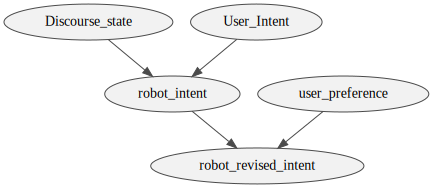

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


# Create a Bayesian network
bn = gum.BayesNet('HCIR')

# Define variables
User_Intent = bn.add(gum.LabelizedVariable('User_Intent', 'User_intent?', ['information_request', 'opinion_expression']))
Discourse_state = bn.add(gum.LabelizedVariable('Discourse_state', 'Discourse_state?', ['Previous_topic', 'New_topic']))
robot_intent = bn.add(gum.LabelizedVariable('robot_intent', 'robot_intent?', ['acknowledge', 'provide_statement']))
user_preference = bn.add(gum.LabelizedVariable('user_preference', 'user_preference?', ['long_statements', 'short_statements']))
robot_revised_intent = bn.add(gum.LabelizedVariable('robot_revised_intent', 'robot_revised_intent?', ['acknowledge_short', 'acknowledge_long', 'provide_statement_long', 'provide_statement_short']))

# Add arcs
for link in [(User_Intent, robot_intent), (Discourse_state, robot_intent), (robot_intent, robot_revised_intent), (user_preference, robot_revised_intent)]:
    bn.addArc(*link)

gnb.showBN(bn,nodeColor={n:0.9 for n in bn.names()}, size="20" )


In [2]:

# Define the CPT for robot_intent given User_Intent and Discourse_state
bn.cpt(robot_intent)[{'User_Intent': 'information_request', 'Discourse_state': 'Previous_topic'}] = [0.6, 0.4]
bn.cpt(robot_intent)[{'User_Intent': 'information_request', 'Discourse_state': 'New_topic'}] = [0.4, 0.6]
bn.cpt(robot_intent)[{'User_Intent': 'opinion_expression', 'Discourse_state': 'Previous_topic'}] = [0.7, 0.3]
bn.cpt(robot_intent)[{'User_Intent': 'opinion_expression', 'Discourse_state': 'New_topic'}] = [0.5, 0.5]

# Define the CPT for robot_revised_intent given robot_intent and user_preference
bn.cpt(robot_revised_intent)[{'robot_intent': 'acknowledge', 'user_preference': 'short_statements'}] = [0.6, 0.2, 0.1, 0.1]
bn.cpt(robot_revised_intent)[{'robot_intent': 'acknowledge', 'user_preference': 'long_statements'}] = [0.2, 0.6, 0.1, 0.1]
bn.cpt(robot_revised_intent)[{'robot_intent': 'provide_statement', 'user_preference': 'short_statements'}] = [0.2, 0.1, 0.5, 0.2]
bn.cpt(robot_revised_intent)[{'robot_intent': 'provide_statement', 'user_preference': 'long_statements'}] = [0.2, 0.2, 0.3, 0.3]

# Display the CPT tables
gnb.showPotential(bn.cpt(robot_intent))
gnb.showPotential(bn.cpt(robot_revised_intent))


In [3]:
# Create an inference engine
ie = gum.LazyPropagation(bn)

# Set evidence for user_intent and user_preference
ie.setEvidence({'User_Intent': 'information_request', 'user_preference': 'long_statements'})

# Now add the evidence for discourse_state
ie.setEvidence({'User_Intent': 'information_request', 'user_preference': 'long_statements', 'Discourse_state': 'New_topic'})

# Compute the posterior distribution again
ie.makeInference()
posterior_robot_intent_with_discourse = ie.posterior(robot_intent)
print("P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements, discourse_state = new_topic) =", posterior_robot_intent_with_discourse[0])

P(robot_intent = acknowledge | user_intent = information_request, user_preference = long_statements, discourse_state = new_topic) = 0.4


When we add the evidence `discourse_state = new_topic`, we are providing additional information to the Bayesian network. This additional evidence influences the probability distribution of the variables in the network, including the probability of `robot_intent = acknowledge`.

Observing the conditional probabilities in the Bayesian network, we see that the probability of `robot_intent = acknowledge` given `user_intent = information_request` and `discourse_state = new_topic` is higher compared to when `discourse_state = previous_topic`. Specifically, when `discourse_state = new_topic`, the probability of `robot_intent = acknowledge` increases to 0.6, whereas when `discourse_state = previous_topic`, it is 0.4.

This change occurs because the Bayesian network encodes the relationships between variables based on conditional probabilities. When `discourse_state = new_topic`, it might imply a need for the robot to acknowledge the new topic more often compared to when it's a continuation of the previous topic. This observation aligns with how in conversations, acknowledging a new topic is a common conversational strategy to signal understanding and engagement.

Therefore, by adding the evidence `discourse_state = new_topic`, the probability of `robot_intent = acknowledge` increases, reflecting the network's updated belief based on the provided evidence.
